# Python Project

In [567]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import f1_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [568]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Train Dataset

In [569]:
train.shape

(891, 12)

In [570]:
test.shape

(418, 11)

In [571]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [572]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [573]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [574]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [575]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Merging

In [576]:
train_objs_num = len(train)

In [577]:
dataset = pd.concat(objs=[train, test], axis=0, ignore_index=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [578]:
dataset.shape

(1309, 12)

In [579]:
dataset.reset_index()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [580]:
#dataset.drop(['index'], axis=1, inplace= True)

# Fixing missing values: AGE

### Names/titles

In [581]:
for i in dataset:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.')

dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


### Using Age and title to make better approximations of the missing values

In [582]:
dataset[dataset.index.duplicated()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title


In [583]:
dataset['Age'] = dataset.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [584]:
dataset.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [585]:
#test['Age'].fillna((test['Age'].mean()), inplace=True)

In [586]:
dataset['Fare'].fillna((dataset['Fare'].mean()), inplace=True)

FIXED!

##  Cabin missing values

In [587]:
dataset['NewCabin']= dataset['Cabin'].str[0]

In [588]:
dataset.groupby('NewCabin', as_index=False)['Fare'].max()

,NewCabin,Fare
0,A,81.8583
1,B,512.3292
2,C,263.0000
3,D,113.2750
4,E,134.5000
5,F,39.0000
6,G,16.7000
7,T,35.5000


In [589]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,NewCabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,NaN


In [590]:
# Create a list to store the data
CabinType = []

# For each row in the column,
for row in dataset['Fare']:
    # if more than a value,
    if row >= 0 and row <= 16.5:
        # Append a letter grade
        CabinType.append('G')
    # else, if more than a value,
    elif row > 16.5 and row <= 39.0:
        # Append a letter grade
        CabinType.append('F')
    # else, if more than a value,
    elif row > 39.0 and row <= 82.0:
        # Append a letter grade
        CabinType.append('A')
    # else, if more than a value,
    elif row > 82.0 and row <= 113.3:
        # Append a letter grade
        CabinType.append('D')
    # else, if more than a value,
    elif row > 113.3 and row <= 134.5:
        # Append a letter grade
        CabinType.append('E')
    # else, if more than a value,
    elif row > 134.5 and row <= 263:
        # Append a letter grade
        CabinType.append('C')
    # else, if more than a value,
    elif row > 263 and row < 513:
        # Append a letter grade
        CabinType.append('B')
    # otherwise,
    else:
        # Append a failing grade
        CabinType.append(np.nan)
        
# Create a column from the list
dataset['NewCabin'] = CabinType

In [591]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,NewCabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,G
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,A
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,G
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,A
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,G


In [592]:
for i in dataset:
    if i in dataset.Fare in range (0.00,13.00):
        dataset['NewCabin'](i)=='C'
    
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,NewCabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,G
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,A
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,G
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,A
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,G


# Cleaning the other columns

In [593]:
dataset['Sex'] =dataset['Sex'].map(lambda s: 1 if s =='male' else 0)

In [594]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,NewCabin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,G
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,A
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,G
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,A
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,G


In [595]:
dataset['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [596]:
dataset['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [597]:
dataset = pd.get_dummies(dataset, columns=['Embarked']);

In [598]:
dataset = pd.get_dummies(dataset, columns=['NewCabin']);

In [599]:
dataset.shape

(1309, 22)

In [600]:
dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace= True)

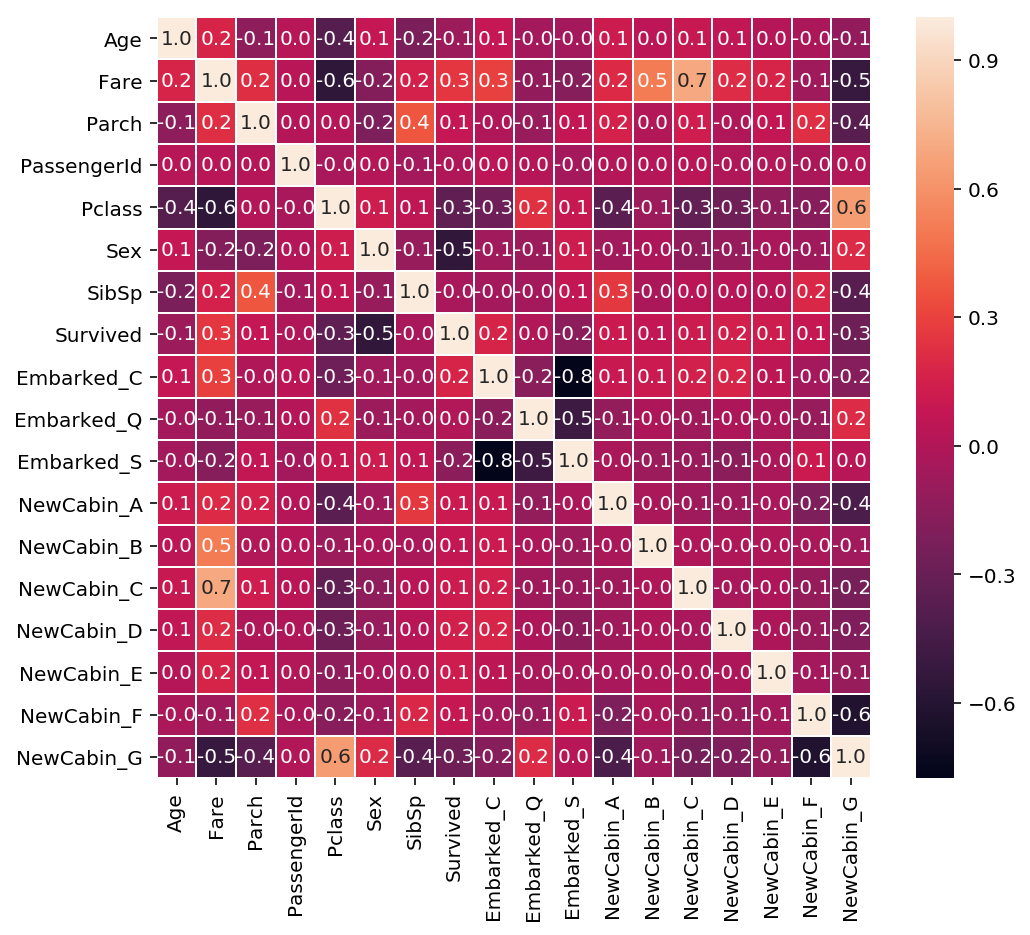

In [601]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(dataset.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [602]:
dataset.shape

(1309, 19)

In [603]:
dataset.isnull().sum()

Age              0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Title            0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
NewCabin_A       0
NewCabin_B       0
NewCabin_C       0
NewCabin_D       0
NewCabin_E       0
NewCabin_F       0
NewCabin_G       0
dtype: int64

# Un-merge

In [604]:
train = dataset[:train_objs_num]
test = dataset[train_objs_num:]

In [605]:
train.shape

(891, 19)

In [606]:
train.isnull().sum()

Age            0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Title          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
NewCabin_A     0
NewCabin_B     0
NewCabin_C     0
NewCabin_D     0
NewCabin_E     0
NewCabin_F     0
NewCabin_G     0
dtype: int64

In [607]:
test.shape # test has the survived column now

(418, 19)

In [608]:
test.isnull().sum()

Age              0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Title            0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
NewCabin_A       0
NewCabin_B       0
NewCabin_C       0
NewCabin_D       0
NewCabin_E       0
NewCabin_F       0
NewCabin_G       0
dtype: int64

In [609]:
test.drop(['Survived'], axis=1, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [610]:
test.shape

(418, 18)

# Visualizations

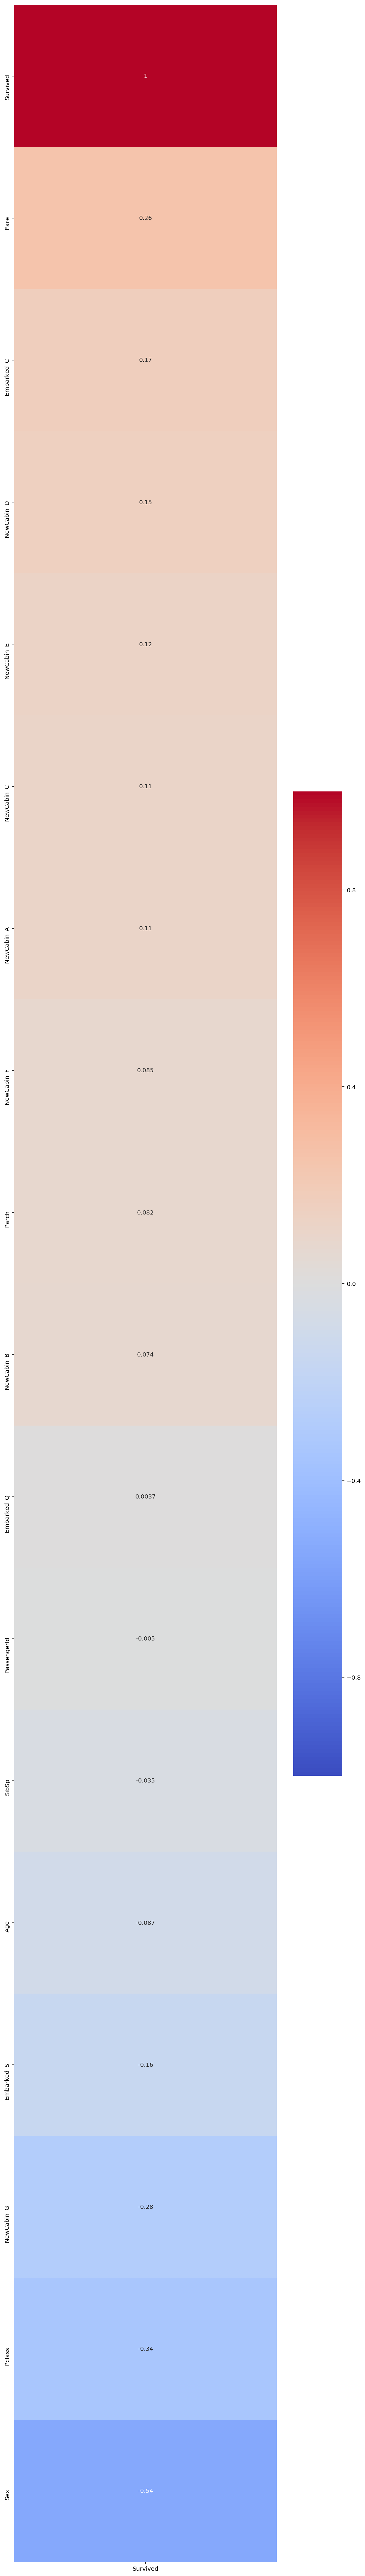

In [611]:
plt.figure(figsize=(10, 80))
sns.heatmap(train.corr()[['Survived']].sort_values('Survived', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [612]:
train.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Title', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'NewCabin_A', 'NewCabin_B', 'NewCabin_C', 'NewCabin_D', 'NewCabin_E',
       'NewCabin_F', 'NewCabin_G'],
      dtype='object')

# Models (train)

In [613]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn. metrics import roc_auc_score

In [614]:
xvars=['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'NewCabin_A', 'NewCabin_B', 'NewCabin_C', 'NewCabin_D', 'NewCabin_E',
       'NewCabin_F', 'NewCabin_G']
X = train[xvars]
y = train['Survived']
y=y.values

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.33, 
                                                    random_state=42)

### Scaling

In [616]:
ss = StandardScaler()
X_train_ss= ss.fit_transform(X_train)
X_test_ss= ss.fit_transform(X_test)

### Model testing (train)

In [617]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_ss,y_train)
lr_score = lr.score(X_train_ss,y_train)
lr_predicts = lr.predict(X_test_ss)
#lr_accuracy = accuracy_score(y_test, lr_predicts)
#lr_rocauc = roc_auc_score(y_test, lr_predicts)

# Logistoc Regression
log = LogisticRegression(C=.1, random_state=42, solver='saga', penalty='elasticnet', l1_ratio=.5)
log.fit(X_train_ss,y_train)
log_preds = log.predict(X_train_ss)
log_resids = y_train - log_preds
log_score = f1_score(y_train, log_preds, average='macro')  

# KNN 
knn= KNeighborsClassifier()
knn.fit(X_train_ss, y_train)
knn_preds= knn.predict(X_train_ss)
knn_resids = y_train - knn_preds
knn_score = f1_score(y_train, knn_preds, average='macro')  

# Bernoulli
brn = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
brn.fit(X_train_ss, y_train)
brn_score = brn.score(X_train_ss, y_train)

# Gauss
gauss = GaussianNB()
gauss.fit(X_train_ss, y_train)
gauss_score = gauss.score(X_train_ss, y_train)

# Bagging
bag = BaggingClassifier(n_estimators= 1000,
                       random_state=42)
bag.fit(X_train_ss, y_train)
preds= bag.predict(X_train_ss)
resids = y_train - preds
bag_score = f1_score(y_train, preds, average='macro')  

# Decision Tree
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train_ss, y_train)
preds= dt.predict(X_train_ss)
resids = y_train - preds
dt_score = f1_score(y_train, preds, average='macro')  

# SVC
svc = SVC(C=.1, kernel='linear', gamma='scale', probability=True, random_state=42)
svc.fit(X_train_ss, y_train)
svc_score = svc.score(X_train_ss, y_train)

# GBC
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_ss, y_train)
gbc_score = gbc.score(X_train_ss, y_train)

In [618]:
print('LinearRegression_Accuracy:\t',lr_score)
print('LogisticRegression_Accuracy:\t',log_score)
print('KNN_Accuracy:\t\t\t',knn_score)
print('Bernoulli_Accuracy:\t\t',brn_score)
print('Gauss_Accuracy:\t\t\t',gauss_score)
print('Bagging_Accuracy:\t\t',bag_score)
print('DecisionTree_accuracy:\t\t',dt_score)
print('SVC_Accuracy:\t\t\t',svc_score)
print('GBC_Accuracy:\t\t\t',gbc_score)

LinearRegression_Accuracy:	 0.3741728010313349
LogisticRegression_Accuracy:	 0.7739883544551549
KNN_Accuracy:			 0.8306432222628158
Bernoulli_Accuracy:		 0.7231543624161074
Gauss_Accuracy:			 0.6644295302013423
Bagging_Accuracy:		 0.978343810181316
DecisionTree_accuracy:		 0.9782595479250513
SVC_Accuracy:			 0.785234899328859
GBC_Accuracy:			 0.8976510067114094


### Model testing (test)

In [619]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_ss,y_train)
lr_score = lr.score(X_test_ss,y_test)
lr_predicts = lr.predict(X_test_ss)
#lr_accuracy = accuracy_score(y_test, lr_predicts)
#lr_rocauc = roc_auc_score(y_test, lr_predicts)

# Logistoc Regression
log = LogisticRegression(C=.1, random_state=42, solver='saga', penalty='elasticnet', l1_ratio=.5)
log.fit(X_train_ss,y_train)
log_preds = log.predict(X_test_ss)
log_resids = y_test - log_preds
log_score = f1_score(y_test, log_preds, average='macro')  

# KNN 
knn= KNeighborsClassifier()
knn.fit(X_train_ss, y_train)
knn_preds= knn.predict(X_test_ss)
knn_resids = y_test - knn_preds
knn_score = f1_score(y_test, knn_preds, average='macro')  

# Bernoulli
brn = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
brn.fit(X_train_ss, y_train)
brn_score = brn.score(X_test_ss, y_test)

# Gauss
gauss = GaussianNB()
gauss.fit(X_train_ss, y_train)
gauss_score = gauss.score(X_test_ss, y_test)

# Bagging
bag = BaggingClassifier(n_estimators= 1000,
                       random_state=42)
bag.fit(X_train_ss, y_train)
preds= bag.predict(X_test_ss)
resids = y_test - preds
bag_score = f1_score(y_test, preds, average='macro')  

# Decision Tree
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train_ss, y_train)
preds= dt.predict(X_test_ss)
resids = y_test - preds
dt_score = f1_score(y_test, preds, average='macro')  

# SVC
svc = SVC(C=.1, kernel='linear', gamma='scale', probability=True, random_state=42)
svc.fit(X_train_ss, y_train)
svc_score = svc.score(X_test_ss, y_test)

# GBC
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_ss, y_train)
gbc_score = gbc.score(X_test_ss, y_test)

In [620]:
print('LinearRegression_Accuracy:\t',lr_score)
print('LogisticRegression_Accuracy:\t',log_score)
print('KNN_Accuracy:\t\t\t',knn_score)
print('Bernoulli_Accuracy:\t\t',brn_score)
print('Gauss_Accuracy:\t\t\t',gauss_score)
print('Bagging_Accuracy:\t\t',bag_score)
print('DecisionTree_accuracy:\t\t',dt_score)
print('SVC_Accuracy:\t\t\t',svc_score)
print('GBC_Accuracy:\t\t\t',gbc_score)

LinearRegression_Accuracy:	 0.45513434987306695
LogisticRegression_Accuracy:	 0.7984972677595628
KNN_Accuracy:			 0.7887768352325821
Bernoulli_Accuracy:		 0.7322033898305085
Gauss_Accuracy:			 0.4067796610169492
Bagging_Accuracy:		 0.803097049793085
DecisionTree_accuracy:		 0.7637489391711789
SVC_Accuracy:			 0.7966101694915254
GBC_Accuracy:			 0.7966101694915254


Text(0.5, 1.0, 'Model Accuracy')

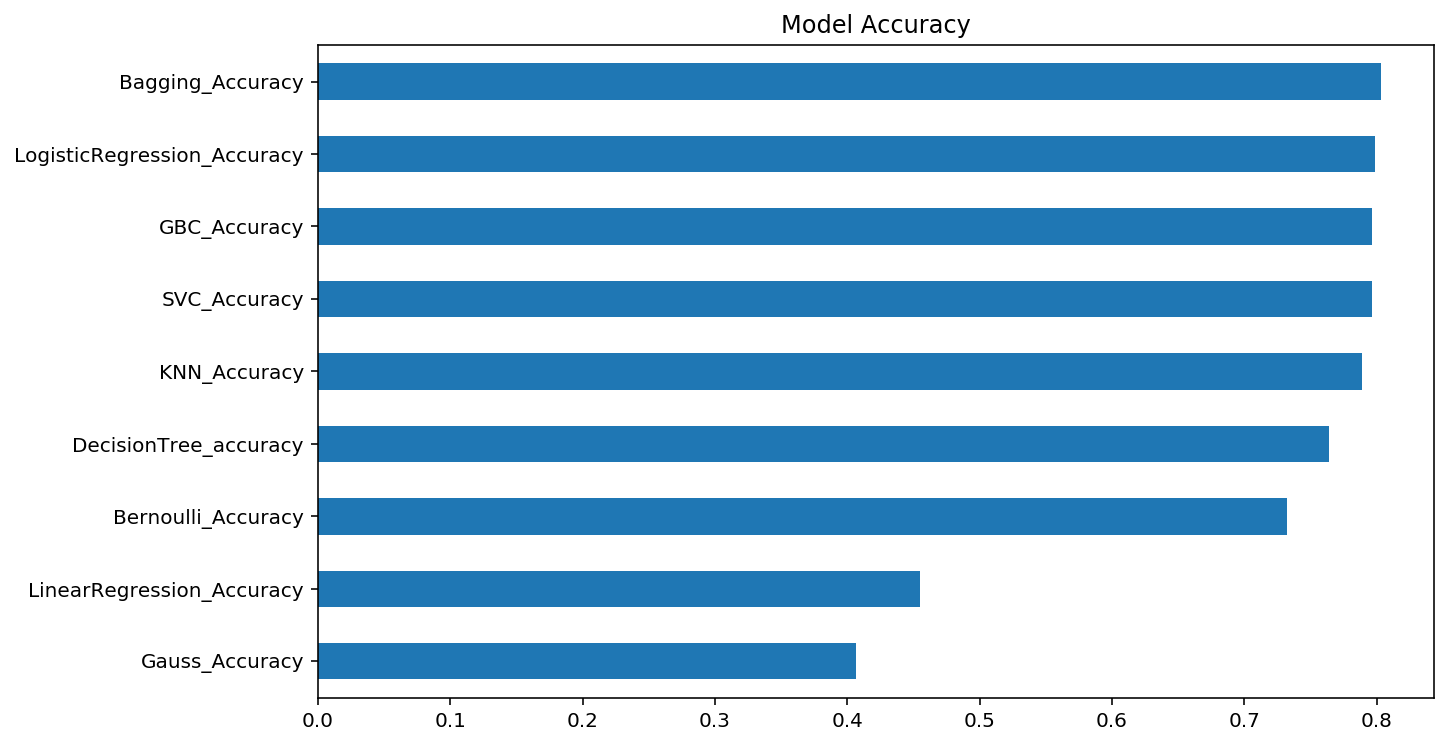

In [621]:
model_accuracy = pd.Series(data=[lr_score,log_score,knn_score,brn_score,gauss_score,bag_score,dt_score,svc_score,gbc_score], 
                index=['LinearRegression_Accuracy','LogisticRegression_Accuracy','KNN_Accuracy',
                                      'Bernoulli_Accuracy','Gauss_Accuracy','Bagging_Accuracy','DecisionTree_accuracy','SVC_Accuracy','GBC_Accuracy'])
fig= plt.figure(figsize=(10,6))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

# Predictions

In [662]:
text_X= test[xvars]

In [663]:
test.isnull().sum()

Age            0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Title          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
NewCabin_A     0
NewCabin_B     0
NewCabin_C     0
NewCabin_D     0
NewCabin_E     0
NewCabin_F     0
NewCabin_G     0
dtype: int64

In [664]:
ss = StandardScaler()
text_X= ss.fit_transform(text_X)

In [665]:
preds = log.predict(text_X)

In [666]:
preds.max()

1.0

In [667]:
preds.min()

0.0

In [668]:
preds.shape

(418,)

In [669]:
submission = pd.DataFrame(test['PassengerId'])

In [670]:
submission.shape

(418, 1)

In [671]:
submission['Survived']= preds

In [672]:
submission['Survived'].value_counts()

0.0    275
1.0    143
Name: Survived, dtype: int64

In [673]:
submission['Survived']= submission['Survived'].astype(int)

In [674]:
submission.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [675]:
submission['Survived'].value_counts()

0    275
1    143
Name: Survived, dtype: int64

In [676]:
submission.shape

(418, 2)

# Submission

In [677]:
submission.to_csv('Subm4', index=False)